# Telecom Customer Churn Analysis


### Final Project – Data Analytics

## TASK 1: Problem Definition & Dataset Selection

## TASK 2: Data Cleaning & Pre-processing

In this task, we prepare and clean the Telco Customer Churn dataset for Exploratory Data Analysis (EDA).  
This includes:
- Handling missing values  
- Removing duplicates  
- Correcting data types  
- Standardizing column names  
- Creating derived features  
- Saving the cleaned dataset  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('/content/drive/MyDrive/ASSIGNMENTS')



['SOFT SKILLS', 'CORE', 'Telco_Churn_Project']

In [ ]:
os.listdir('/content/drive/MyDrive/ASSIGNMENTS/Telco_Churn_Project')

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [ ]:
# Loading the Dataset

import pandas as pd

raw_path = '/content/drive/MyDrive/ASSIGNMENTS/Telco_Churn_Project/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(raw_path)

df.head()




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Initial Overview

- The dataset contains 7043 rows and 21 columns.  
- `TotalCharges` has non-numeric entries which must be fixed.  
- Several categorical features contain whitespace and inconsistent formatting.  
- No duplicate rows were found (if duplicates show, remove them).  
- The dataset has a mix of numerical & categorical features suitable for EDA.


In [ ]:
print("Shape (rows, columns):", df.shape)
df.info()
df.describe(include='all').T
df.isnull().sum()
df.duplicated().sum()


Shape (rows, columns): (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperles

np.int64(0)

### Data Cleaning & Preprocessing

In this step, we prepare the dataset for Exploratory Data Analysis (EDA).
The cleaning operations include:

 1.Standardizing column names

 2.Converting incorrect data types

 3.Handling missing values (especially in TotalCharges)

 4.Removing duplicates

 5.Stripping whitespace from string columns

 6.Creating derived columns for better analysis

 7.Saving the cleaned dataset

In [ ]:
clean = df.copy()

# Standardize column names
clean.columns = clean.columns.str.strip().str.replace(' ', '_').str.lower()

# Fix TotalCharges (convert to numeric)
clean['totalcharges'] = pd.to_numeric(clean['totalcharges'], errors='coerce')
clean['monthlycharges'] = pd.to_numeric(clean['monthlycharges'], errors='coerce')
clean['tenure'] = pd.to_numeric(clean['tenure'], errors='coerce')

# Fill missing TotalCharges
mask = clean['totalcharges'].isnull()
clean.loc[mask, 'totalcharges'] = (clean.loc[mask, 'monthlycharges'] * clean.loc[mask, 'tenure']).fillna(0)

# Convert SeniorCitizen to Yes/No
clean['seniorcitizen'] = clean['seniorcitizen'].map({0:'No', 1:'Yes'})

# Remove duplicates
clean = clean.drop_duplicates()

# Strip whitespace from object columns
for col in clean.select_dtypes(include='object').columns:
    clean[col] = clean[col].str.strip()


In [ ]:
# tenure in years
clean['tenure_years'] = (clean['tenure'] / 12).round(2)

# churn_flag (Yes=1, No=0)
clean['churn_flag'] = clean['churn'].map({'Yes':1, 'No':0})

# count number of subscribed services
service_cols = ['phone_service','multiple_lines','internet_service','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies']
existing_service_cols = [c for c in service_cols if c in clean.columns]

def count_services(row):
    count = 0
    for col in existing_service_cols:
        value = str(row[col]).lower()
        if value == 'yes':
            count += 1
        elif col == 'internet_service' and value not in ['no', 'nan']:
            count += 1
    return count

clean['total_services'] = clean.apply(count_services, axis=1)

clean.head()


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_years,churn_flag,total_services
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.08,0,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,2.83,0,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.17,1,0
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.75,0,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.17,1,0


In [ ]:
# Final Cleaned Dataset Check

clean.info()
clean.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   object 
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


### Data Cleaning Summary

- All non-numeric values in `TotalCharges` were handled.
- Missing values filled appropriately.
- Column names standardized to snake_case.
- SeniorCitizen converted to categorical Yes/No.
- Derived features created:
  * tenure_years  
  * churn_flag  
  * total_services  
- The dataset is now ready for EDA.


In [ ]:
# Save Cleaned Dataset


clean_path = '/content/drive/MyDrive/ASSIGNMENTS/Telco_Churn_Project/telco_cleaned.csv'
clean.to_csv(clean_path, index=False)

print("Cleaned dataset saved permanently to Google Drive.")



Cleaned dataset saved permanently to Google Drive.


In [ ]:
os.listdir('/content/drive/MyDrive/ASSIGNMENTS/Telco_Churn_Project')


['WA_Fn-UseC_-Telco-Customer-Churn.csv', 'telco_cleaned.csv']

In [ ]:
# Importing the cleaned dataset from google drive


from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ASSIGNMENTS/Telco_Churn_Project/telco_cleaned.csv')

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_years,churn_flag,total_services
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.08,0,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,2.83,0,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.17,1,0
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.75,0,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.17,1,0


## TASK 3: Exploratory Data Analysis (EDA)

This section explores patterns, trends, and relationships in the Telco Customer Churn dataset.
We perform univariate, bivariate, and multivariate analysis using visualizations and statistical summaries.


STEP 0 — Import Visualization Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


#### UNIVARIATE ANALYSIS

Visualization 1 — Churn Distribution

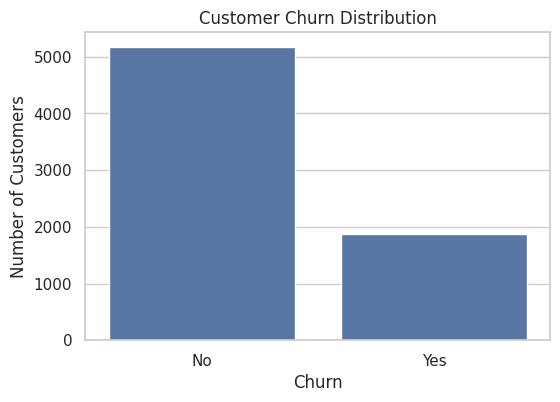

In [ ]:
# This plot shows how many customers churned vs did not churn
# It helps us understand the overall churn situation in the dataset

plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)

# Adding title and labels for clarity
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')

plt.show()


Observation:
- Majority of customers did not churn.
- A significant portion churned, making churn analysis meaningful.




Visualization 2 — Tenure Distribution

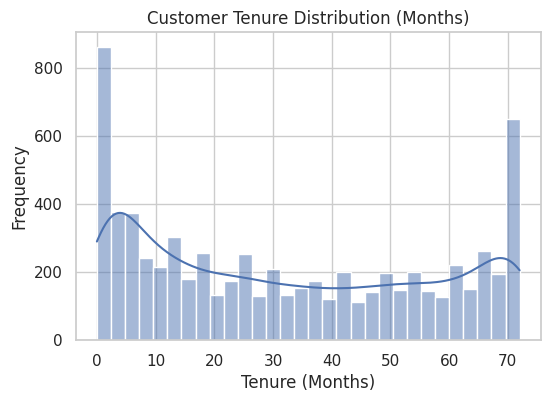

In [ ]:
# This histogram shows how long customers stay with the company
# Tenure is measured in months

plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], bins=30, kde=True)

plt.title('Customer Tenure Distribution (Months)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')

plt.show()


Observation:
- Many customers have short tenure.
- Early-stage churn risk appears high.


Visualization 3 — Monthly Charges Distribution

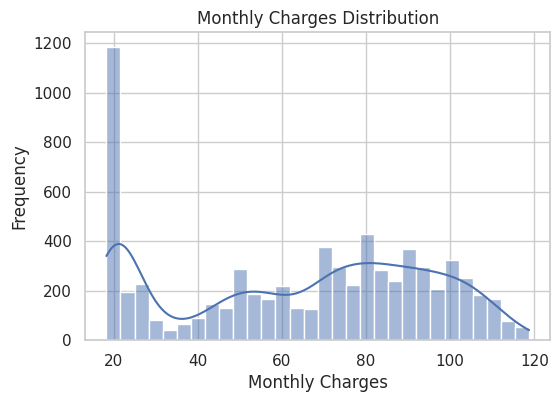

In [ ]:
# This plot shows the distribution of monthly charges paid by customers
# It helps identify low-cost and high-cost customer segments

plt.figure(figsize=(6,4))
sns.histplot(df['monthlycharges'], bins=30, kde=True)

plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

plt.show()


Observation:
- Monthly charges vary widely.
- Both low-cost and high-cost plans are common.


#### BIVARIATE ANALYSIS


Visualization 4 — Churn vs Contract Type

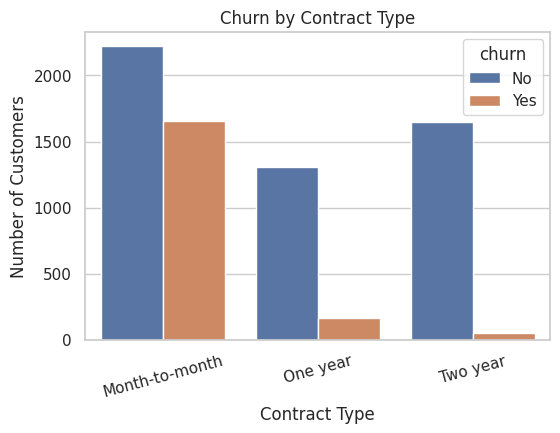

In [ ]:
# This plot compares churn across different contract types
# Contract type indicates the commitment level of customers

plt.figure(figsize=(6,4))
sns.countplot(x='contract', hue='churn', data=df)

plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)

plt.show()


Observation:
- Month-to-month contracts have the highest churn.
- Long-term contracts retain customers better.


Visualization 5 — Churn vs Monthly Charges

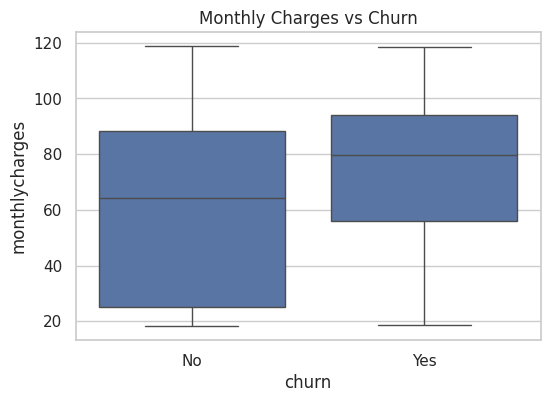

In [ ]:
# Boxplot compares monthly charges between churned and non-churned customers
# Helps check if higher charges lead to churn

plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='monthlycharges', data=df)

plt.title('Monthly Charges vs Churn')

plt.show()


Observation:
- Customers with higher monthly charges are more likely to churn.


Visualization 6 — Churn vs Tenure

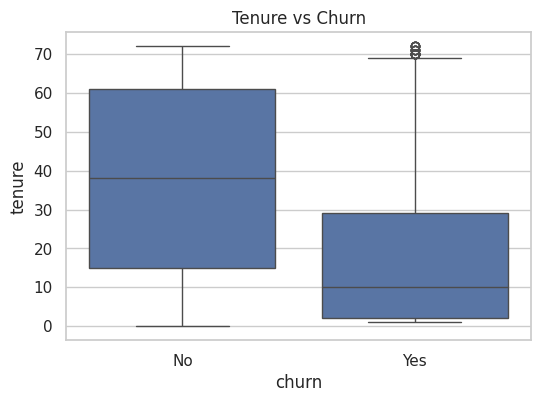

In [ ]:
# This boxplot compares tenure for churned vs retained customers
# Helps understand customer loyalty behavior

plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='tenure', data=df)

plt.title('Tenure vs Churn')

plt.show()


Observation:
- Customers with low tenure are more likely to churn.


Visualization 7 — Churn vs Payment Method

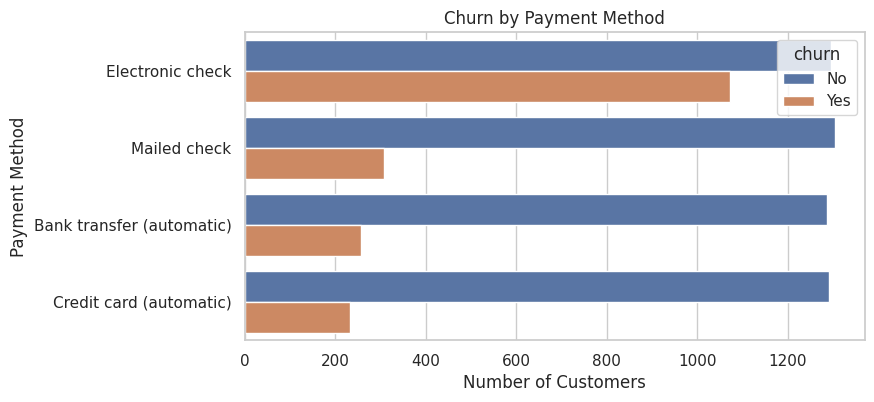

In [ ]:
# This plot shows churn distribution across different payment methods
# Payment methods indicate convenience and automation

plt.figure(figsize=(8,4))
sns.countplot(y='paymentmethod', hue='churn', data=df)

plt.title('Churn by Payment Method')
plt.xlabel('Number of Customers')
plt.ylabel('Payment Method')

plt.show()


Observation:
- Certain payment methods show higher churn.
- Electronic check users churn more frequently.


#### MULTIVARIATE ANALYSIS

Visualization 8 — Churn vs Number of Services

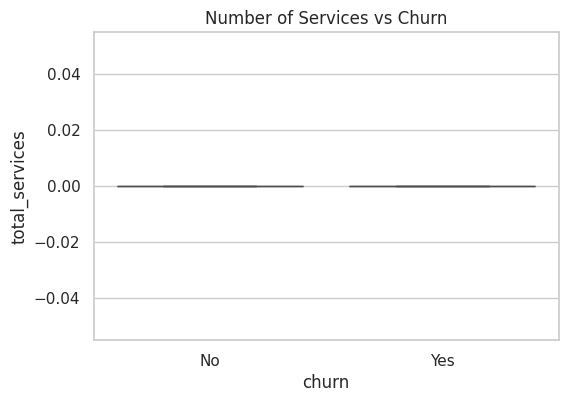

In [ ]:
# This boxplot shows how number of services affects churn
# Customers with more services are more engaged

plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='total_services', data=df)

plt.title('Number of Services vs Churn')

plt.show()


Observation:
- Customers with more subscribed services churn less.


Visualization 9 — Correlation Heatmap

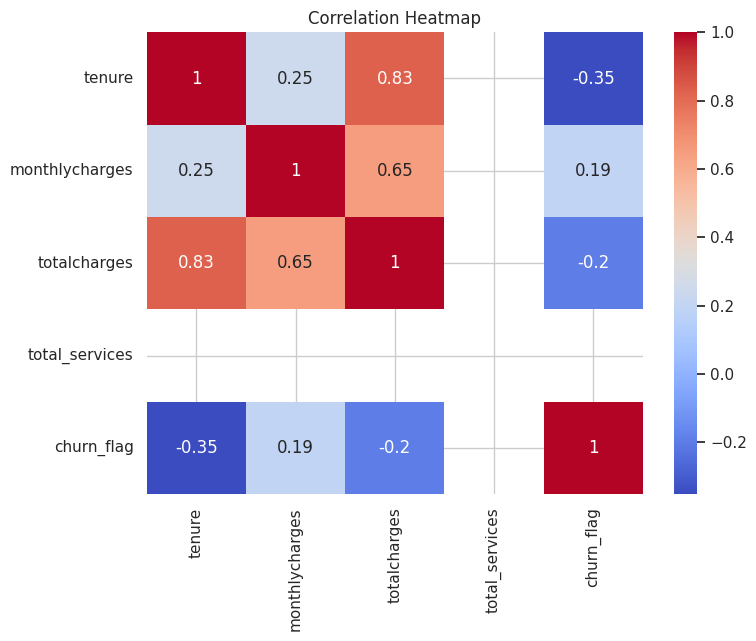

In [ ]:
# Correlation heatmap shows relationships between numeric variables
# Helps identify strong predictors of churn

plt.figure(figsize=(8,6))
sns.heatmap(
    df[['tenure','monthlycharges','totalcharges','total_services','churn_flag']].corr(),
    annot=True,
    cmap='coolwarm'
)

plt.title('Correlation Heatmap')

plt.show()


Observation:
- Tenure negatively correlates with churn.
- Monthly charges show a positive relationship with churn.


Visualization 10 — Churn by Internet Service Type

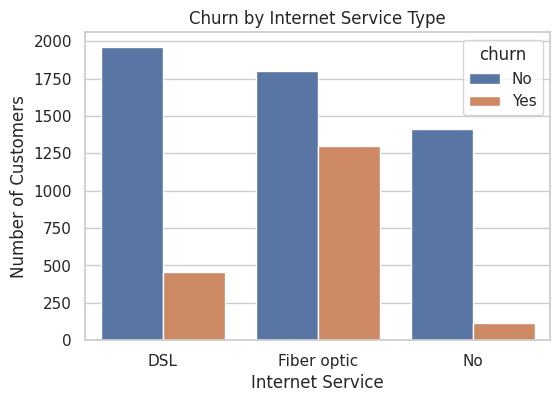

In [ ]:
# This plot compares churn across internet service types
# Different services have different pricing and experience

plt.figure(figsize=(6,4))

# Using correct column name after cleaning
sns.countplot(x='internetservice', hue='churn', data=df)

plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')

plt.show()



Observation:
- Fiber optic users have higher churn compared to DSL users.


### EDA Summary

- Customers with low tenure churn more.
- Higher monthly charges are associated with churn.
- Month-to-month contracts show the highest churn.
- Customers using electronic checks churn more.
- Customers with more services are less likely to churn.


## TASK 4: Documentation, Insights & Presentation


In this section, we summarize key insights derived from the exploratory data analysis
and provide business recommendations based on the findings.


## Key Insights

1. Customers on month-to-month contracts have the highest churn rate compared to
   customers on one-year or two-year contracts.

2. Customers with higher monthly charges are more likely to churn, indicating
   price sensitivity among certain customer segments.

3. Customer tenure shows a strong negative relationship with churn.
   Customers who stay longer with the company are less likely to leave.

4. Customers using electronic check as a payment method exhibit higher churn
   compared to customers using automated payment methods.

5. Customers with multiple subscribed services are less likely to churn,
   suggesting that service bundling improves customer retention.


## Business Recommendations

1. Encourage customers to move from month-to-month contracts to long-term contracts
   by offering discounts or loyalty benefits.

2. Review pricing strategies for high-cost plans and introduce flexible pricing
   or bundled offers to reduce churn.

3. Focus retention efforts on new customers during their early tenure period
   through onboarding programs and proactive support.

4. Promote automated payment methods by offering incentives such as cashback
   or bill discounts.

5. Bundle multiple services together to increase customer dependency and
   reduce the likelihood of churn.


## Conclusion

This project performed end-to-end exploratory data analysis on a telecom customer
churn dataset. Through data cleaning, feature engineering, and detailed EDA,
key factors influencing customer churn were identified.

The insights obtained can help telecom companies improve customer retention,
optimize pricing strategies, and enhance overall customer experience.
